## G03F Patents Citation Network Among Firms
4 period: 2004-2008, 2009-2013, 2014-2018, 2019-2022

### Load Data: Adjacency Matrix and Attribute Tables

In [1]:
import pandas as pd

adjmat_0408 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 1)
adjmat_0913 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 2)
adjmat_1418 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 3)
adjmat_1922 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 4)
attr_0408 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 5)
attr_0913 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 6)
attr_1418 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 7)
attr_1922 = pd.read_excel(r"C:\Users\user\Documents\G03F_patent_citation_top50.xlsx", sheet_name = 8)

### Data Wrangling: Preparing Attribute Tables

In [2]:
# clean attribute tables
for attr in [attr_0408,attr_0913,attr_1418,attr_1922]:
    attr[['專利權人2']] = attr[['專利權人']]# copy assignee column

    splitted_cols = attr.loc[:,'專利權人2'].str.rsplit('(',n=1)# split column
    df = pd.DataFrame()
    for row in splitted_cols:
        df = pd.concat([df, pd.DataFrame(row).T], axis = 0)
    df = df.reset_index()
    df = df.drop('index', axis = 1)

    attr['專利權人'] = df[0] # replace original assignee column with cleaned assignee name
    attr['國家'] = df[1].str.replace(')', '') # clean country column
    attr = attr.drop('專利權人2', axis = 1) # drop columns

In [3]:
# concat four attribute tables
attr_all = pd.DataFrame()
period = ['2004_2008','2009_2013','2014_2018','2019_2022']
for i, attr in enumerate([attr_0408,attr_0913,attr_1418,attr_1922]):
    attr['時期'] = period[i]
    attr_all = pd.concat([attr_all, attr], axis = 0)
attr_all

,專利權人,專利件數,他人引證次數,自我引證次數,發明人數,平均專利年齡,活動年期,相對研發能力,專利權人2,國家,時期
0,FUJIFILM CORPORATION,98,11,6,87,16,4,1,FUJIFILM CORPORATION (JP),JP,2004_2008
1,"SHIN-ETSU CHEMICAL CO, LTD.",53,4,4,58,16,5,0.54,"SHIN-ETSU CHEMICAL CO, LTD. (JP)",JP,2004_2008
2,"TOKYO OHKA KOGYO CO., LTD.",28,1,6,61,16,4,0.33,"TOKYO OHKA KOGYO CO., LTD. (JP)",JP,2004_2008
3,ASML NETHERLANDS B.V.,27,0,1,66,16,5,0.32,ASML NETHERLANDS B.V. (NL),NL,2004_2008
4,"SAMSUNG ELECTRONICS CO., LTD.",24,0,1,63,16,4,0.29,"SAMSUNG ELECTRONICS CO., LTD. (KR)",KR,2004_2008
...,...,...,...,...,...,...,...,...,...,...,...
43,CHEIL INDUSTRIES INC.,1,0,0,14,4,1,0.0,CHEIL INDUSTRIES INC. (KR),KR,2019_2022
44,LASER PACIFIC MEDIA CORPORATION,1,1,0,4,4,1,0.0,LASER PACIFIC MEDIA CORPORATION (US),US,2019_2022
45,NPEC INC.,1,1,0,4,4,1,0.0,NPEC INC. (US),US,2019_2022
46,QUALEX INC.,1,1,0,4,4,1,0.0,QUALEX INC. (US),US,2019_2022


In [4]:
attr_all = attr_all.reset_index()
attr_all = attr_all.drop('專利權人2', axis = 1)
attr_all = attr_all.drop('index', axis = 1)
attr_all

,專利權人,專利件數,他人引證次數,自我引證次數,發明人數,平均專利年齡,活動年期,相對研發能力,國家,時期
0,FUJIFILM CORPORATION,98,11,6,87,16,4,1,JP,2004_2008
1,"SHIN-ETSU CHEMICAL CO, LTD.",53,4,4,58,16,5,0.54,JP,2004_2008
2,"TOKYO OHKA KOGYO CO., LTD.",28,1,6,61,16,4,0.33,JP,2004_2008
3,ASML NETHERLANDS B.V.,27,0,1,66,16,5,0.32,NL,2004_2008
4,"SAMSUNG ELECTRONICS CO., LTD.",24,0,1,63,16,4,0.29,KR,2004_2008
...,...,...,...,...,...,...,...,...,...,...
181,CHEIL INDUSTRIES INC.,1,0,0,14,4,1,0.0,KR,2019_2022
182,LASER PACIFIC MEDIA CORPORATION,1,1,0,4,4,1,0.0,US,2019_2022
183,NPEC INC.,1,1,0,4,4,1,0.0,US,2019_2022
184,QUALEX INC.,1,1,0,4,4,1,0.0,US,2019_2022


In [5]:
attr_all.to_csv(r"C:\Users\user\Documents\G03F_attributes.csv")

### Data Wrangling: Creating Nework Object

In [ ]:
# check if row labels and column names are the same in each adjacency matrix
for adjmat in [adjmat_0408,adjmat_0913,adjmat_1418,adjmat_1922]:
    alter = adjmat.columns[1:].to_list()
    ego = adjmat.iloc[:,0].to_list()
    print(alter == ego)

In [2]:
# change first column name
adjmat_0408 = adjmat_0408.rename(columns={'引證 \\ 被引證': 'index'})
adjmat_0913 = adjmat_0913.rename(columns={'引證 \\ 被引證': 'index'})
adjmat_1418 = adjmat_1418.rename(columns={'引證 \\ 被引證': 'index'})
adjmat_1922 = adjmat_1922.rename(columns={'引證 \\ 被引證': 'index'})

In [3]:
# set first column as index
adjmat_0408 = adjmat_0408.set_index('index')
adjmat_0913 = adjmat_0913.set_index('index')
adjmat_1418 = adjmat_1418.set_index('index')
adjmat_1922 = adjmat_1922.set_index('index')

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# define a function to transform adjacency matrix to edgelist
def AdjMat2EdgeList(adjmat):
    elist = []
    for row in adjmat.index: # specify row node
        for col in adjmat.columns: # specify column node
            weight = adjmat.loc[row, col] # citation count
            if weight > 0: # only record existing edges, ignore other pairs
                edge = (row, col, weight) # define an edge
                elist.append(edge) # append edge to edgelist
    return elist

In [6]:
# create graph objects
Graphs = {}
for i, adjmat in enumerate([adjmat_0408, adjmat_0913, adjmat_1418, adjmat_1922]):
    edgelist = AdjMat2EdgeList(adjmat)
    G = nx.DiGraph()
    G.add_weighted_edges_from(edgelist)
    graph_name = f'G{i+1}'
    Graphs[graph_name] = G

In [107]:
Graphs

{'G1': <networkx.classes.digraph.DiGraph at 0x1b49b47f500>,
 'G2': <networkx.classes.digraph.DiGraph at 0x1b4aa2da390>,
 'G3': <networkx.classes.digraph.DiGraph at 0x1b49ae0ac30>,
 'G4': <networkx.classes.digraph.DiGraph at 0x1b49aec9b20>}

In [7]:
# create graphs without self-loops
Graphs_noloop = {}
for i, graph in enumerate(['G1','G2','G3','G4']):
    G = Graphs[graph]
    H = G.copy()
    self_loops = list(nx.selfloop_edges(G))  # Find all self-loops
    H.remove_edges_from(self_loops)
    graph_name = f'G{i+1}'
    Graphs_noloop[graph_name] = H

In [109]:
Graphs_noloop

{'G1': <networkx.classes.digraph.DiGraph at 0x1b4974f0a40>,
 'G2': <networkx.classes.digraph.DiGraph at 0x1b4973a9eb0>,
 'G3': <networkx.classes.digraph.DiGraph at 0x1b4ab131eb0>,
 'G4': <networkx.classes.digraph.DiGraph at 0x1b49b36c620>}

In [8]:
# save graph object into .graphml file
nx.write_graphml(Graphs['G1'], r"C:\Users\user\Documents\G03F_2004_2008.graphml")
nx.write_graphml(Graphs['G2'], r"C:\Users\user\Documents\G03F_2009_2013.graphml")
nx.write_graphml(Graphs['G3'], r"C:\Users\user\Documents\G03F_2014_2018.graphml")
nx.write_graphml(Graphs['G4'], r"C:\Users\user\Documents\G03F_2019_2022.graphml")
nx.write_graphml(Graphs_noloop['G1'], r"C:\Users\user\Documents\G03F_2004_2008_noloop.graphml")
nx.write_graphml(Graphs_noloop['G2'], r"C:\Users\user\Documents\G03F_2009_2013_noloop.graphml")
nx.write_graphml(Graphs_noloop['G3'], r"C:\Users\user\Documents\G03F_2014_2018_noloop.graphml")
nx.write_graphml(Graphs_noloop['G4'], r"C:\Users\user\Documents\G03F_2019_2022_noloop.graphml")

In [9]:
# load the graphs again using .graphml file
G1 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2004_2008_noloop.graphml")
G2 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2009_2013_noloop.graphml")
G3 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2014_2018_noloop.graphml")
G4 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2019_2022_noloop.graphml")

### Basic Visualization

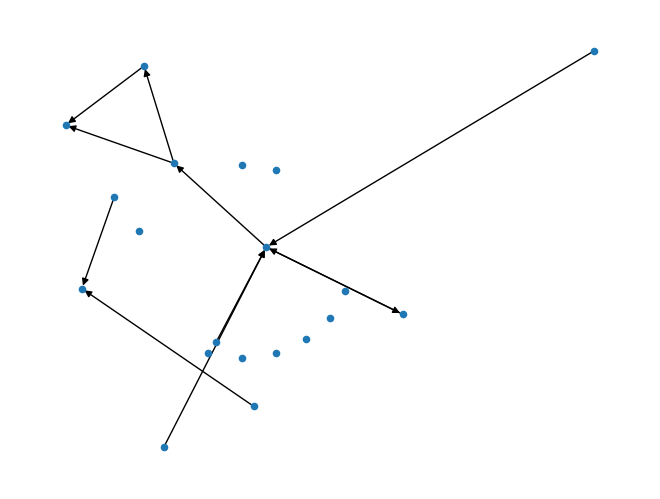

In [10]:
pos = nx.kamada_kawai_layout(Graphs_noloop['G1'])
nx.draw(Graphs_noloop['G1'], pos, arrows = True, arrowsize = 10, node_size = 20)

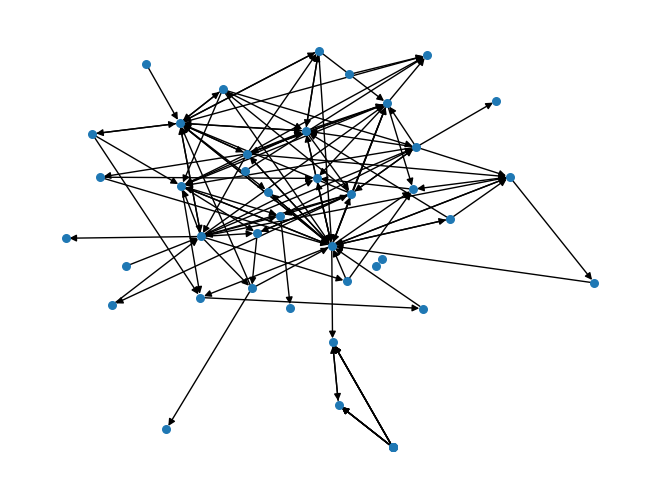

In [11]:
pos = nx.kamada_kawai_layout(Graphs_noloop['G2'])
nx.draw(Graphs_noloop['G2'], pos, arrows = True, arrowsize = 10, node_size = 30)

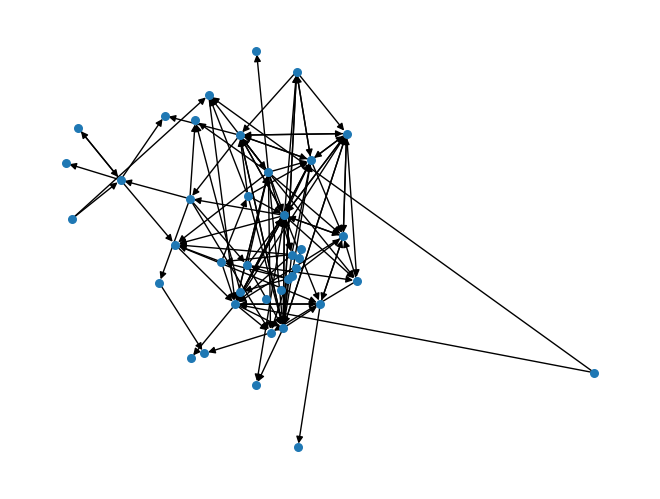

In [12]:
pos = nx.kamada_kawai_layout(Graphs_noloop['G3'])
nx.draw(Graphs_noloop['G3'], pos, arrows = True, arrowsize = 10, node_size = 30)

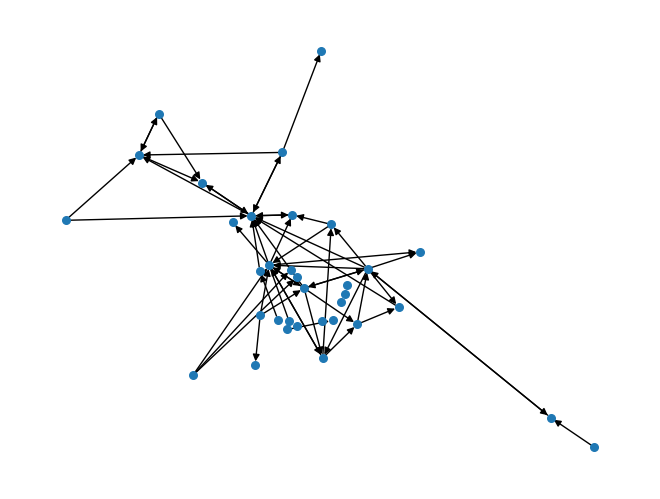

In [13]:
pos = nx.kamada_kawai_layout(Graphs_noloop['G4'])
nx.draw(Graphs_noloop['G4'], pos, arrows = True, arrowsize = 10, node_size = 30)

Preliminary Observations:
+ In the first period, 2004-2008, the citation network among firms in G03F patents field had just started to form.
+ In the second period, 2009-2013, the connectivity of the network had quickly elevated.
+ In the thrid period, 2014-2018, there formed a densely-connected and cohesive core, implying that the network has developed some kind of hierarchical structure characteristic.
+ In the latest period, 2019-2022, the network had somehow dissolved at large. There were some obviously highly-connected leaders remaining in the field. Other competitors may had exited the field or became one of those peripherial players.

### Network Analysis: global level

We would like to inspect the global network structure of those four periods and see the changing trend.

The global network structure being inspected are:
+ node numbers
+ edge numbers
+ density
+ bidirected edge numbers (mutuality)
+ triad counts
+ component numbers
+ largest component proportion
+ Diameter, or longest shortest path length (small world related)
+ global clustering coefficent (small world related)
+ degree distribution (power law related)

In [9]:
import powerlaw

In [10]:
# create empty data frame
column_names = ['period', 'node_num', 'edge_num', 'graph_density', 'bidirected_num', 
                'triad_030T_num', 'triad_030C_num', 'wcc_num', 'largest_wcc_node_num', 
                'largest_wcc_edge_num', 'diameter_undirected_largest_wcc', 'gcc', 
                'power_law_alpha']
Graphs_noloop_global_attr_df = pd.DataFrame(columns=column_names)

period_list = ['2004_2008','2009_2013','2014_2018','2019_2022']

for i, G in enumerate([G1,G2,G3,G4]):
    period = period_list[i]
    node_num = G.number_of_nodes()
    edge_num = G.number_of_edges()
    graph_density = nx.density(G)
    
    # bidirected edges
    bidirected_num = 0
    for u, v in G.edges():
        if G.has_edge(v, u):
            bidirected_num += 1
    
    # triad census: transitivity and cycling
    triad_030T_num = nx.triadic_census(G)['030T']
    triad_030C_num = nx.triadic_census(G)['030C']

    # weakly connected component number
    wcc = list(nx.weakly_connected_components(G))
    wcc_num = 0
    for component in wcc:
        wcc_num += 1

    # Number of nodes and edges in the largest weakly connected component
    largest_wcc = max(wcc, key = len)
    largest_wcc_subgraph = G.subgraph(largest_wcc)
    largest_wcc_node_num = largest_wcc_subgraph.number_of_nodes()
    largest_wcc_edge_num = largest_wcc_subgraph.number_of_edges()

    # diameter, or longest shorest path length of the largest component without considering direction
    undirected_largest_wcc = largest_wcc_subgraph.to_undirected()
    diameter_undirected_largest_wcc = nx.diameter(undirected_largest_wcc)

    # global clustering coefficient
    G_undirected = G.to_undirected()
    gcc = nx.transitivity(G_undirected)

    # power law exponent (alpha) of degree distribution after log-log transform
    degrees = [deg for _, deg in G.degree()]
    fit = powerlaw.Fit(degrees)
    power_law_alpha = fit.alpha

    ## collect all variables
    var_list = [[period, node_num,edge_num,graph_density,bidirected_num,triad_030T_num,triad_030C_num,wcc_num,
                largest_wcc_node_num,largest_wcc_edge_num,diameter_undirected_largest_wcc,gcc,power_law_alpha]]
    new_df = pd.DataFrame(var_list, columns=column_names)
    Graphs_noloop_global_attr_df = pd.concat([Graphs_noloop_global_attr_df, new_df], ignore_index=True)
    

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\user\AppData\Local\Temp\ipykernel_15456\3380298145.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Graphs_noloop_global_attr_df = pd.concat([Graphs_noloop_global_attr_df, new_df], ignore_index=True)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [11]:
Graphs_noloop_global_attr_df.T

,0,1,2,3
period,2004_2008,2009_2013,2014_2018,2019_2022
node_num,20,44,40,34
edge_num,11,124,116,53
graph_density,0.028947,0.065539,0.074359,0.047237
bidirected_num,2,38,40,16
triad_030T_num,1,27,25,8
triad_030C_num,0,5,1,1
wcc_num,11,3,7,7
largest_wcc_node_num,8,42,34,27
largest_wcc_edge_num,9,124,116,52


In [12]:
Graphs_noloop_global_attr_df.T.to_csv(r"C:\Users\user\Documents\G03F_global_indicators.csv")

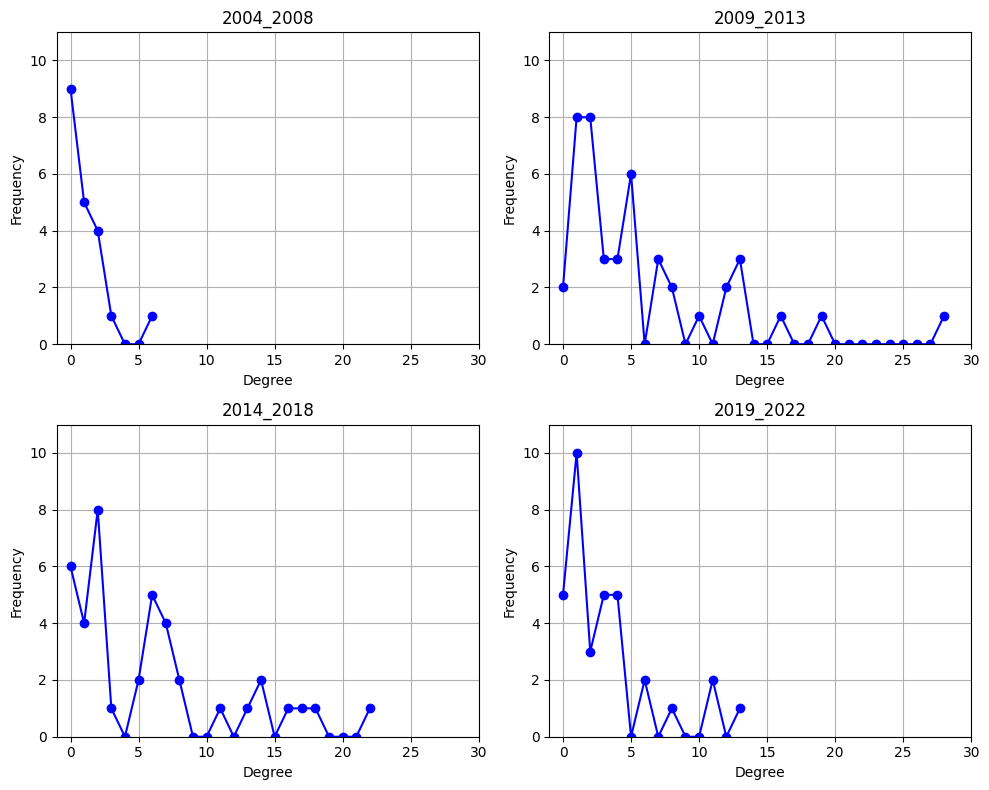

In [105]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Plot degree distribution for each graph
for i, G in enumerate([G1,G2,G3,G4]):
    degrees = [deg for _, deg in G.degree()]
    degree_distribution = nx.degree_histogram(G)
    axs[i].plot(degree_distribution, 'b-', marker='o')
    axs[i].set_title(period_list[i])
    axs[i].set_xlabel('Degree')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(-1,30)
    axs[i].set_ylim(0,11)
    axs[i].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\user\AppData\Local\Temp\ipykernel_18148\2837929064.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


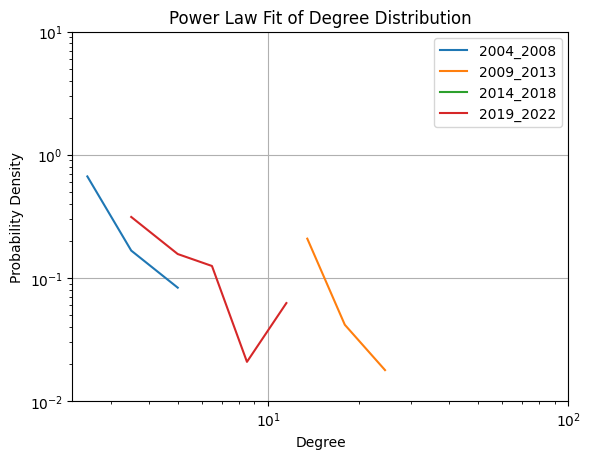

In [98]:
for i, G in enumerate([G1,G2,G3,G4]):
    degrees = [deg for _, deg in G.degree()]
    fit = powerlaw.Fit(degrees)
    fit.plot_pdf(label=period_list[i])

# Add labels and legend
plt.title('Power Law Fit of Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.xlim(0, 100)
plt.ylim(0.01, 10)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

### Network Analysis: node level

In [13]:
Centrality = pd.DataFrame()
period_list = ['2004_2008','2009_2013','2014_2018','2019_2022']
for i, G in enumerate([G1,G2,G3,G4]):
    # calculate centrality indicators
    centrality = {
        'period': period_list[i],
        'indegree': nx.in_degree_centrality(G),
        'closeness': nx.closeness_centrality(G),
        'betweenness': nx.betweenness_centrality(G),
        'harmonic': nx.harmonic_centrality(G),
        'eigenvector': nx.eigenvector_centrality(G),
        'katz': nx.katz_centrality(G),
        'pagerank': nx.pagerank(G, alpha=0.85),
        'laplacian': nx.laplacian_centrality(G)
    }
    df = pd.DataFrame(centrality)
    Centrality = pd.concat([Centrality, df], axis = 0)

In [14]:
len(Centrality)

138

In [15]:
Centrality.iloc[:,1:].corr()

,indegree,closeness,betweenness,harmonic,eigenvector,katz,pagerank,laplacian
indegree,1.000000,0.793477,0.736978,0.770034,0.788772,0.719761,0.695686,0.397841
closeness,0.793477,1.000000,0.525619,0.982798,0.684048,0.419375,0.451797,0.121624
betweenness,0.736978,0.525619,1.000000,0.517496,0.525342,0.518936,0.499971,0.275816
harmonic,0.770034,0.982798,0.517496,1.000000,0.598141,0.354914,0.367746,0.011424
eigenvector,0.788772,0.684048,0.525342,0.598141,1.000000,0.733432,0.728141,0.492207
katz,0.719761,0.419375,0.518936,0.354914,0.733432,1.000000,0.709078,0.757356
pagerank,0.695686,0.451797,0.499971,0.367746,0.728141,0.709078,1.000000,0.730402
laplacian,0.397841,0.121624,0.275816,0.011424,0.492207,0.757356,0.730402,1.000000


In [16]:
Centrality.to_csv(r"C:\Users\user\Documents\G03F_centrality.csv")

### Next Step: Merge Attribute and Centrality into One DataFrame

Append centrality indicators to G03F_attribute table. We can see centralities as node attributes that reflects their networking characteristic in the inter-firm citation network.

Now we have three tables:

+ G03F_attribute.csv
+ Graphs_noloop_global_attr_df
+ Centrality

We are going to merge G03F_attribute and Centrality. Both are at node-level. But we have to first make sure node label in these two table match.


In [1]:
import pandas as pd
import re

In [12]:
# load attribute table and centrality table
attr_df = pd.read_csv(r"C:\Users\user\Documents\G03F_attributes.csv")
centrality_df = pd.read_csv(r"C:\Users\user\Documents\G03F_centrality.csv")

In [13]:
centrality_df = centrality_df.rename(columns={'Unnamed: 0': 'firm'})
attr_df = attr_df.drop('Unnamed: 0', axis = 1)

#### match firm names

In [14]:
attr_firm_list = attr_df['專利權人'].to_list()
#print(attr_firm_list)
centrality_firm_list = centrality_df['firm'].to_list()
#print(centrality_firm_list)

In [15]:
def clean_firm_name(name):
    # Remove common suffixes and special characters
    name = re.sub(r'(CORPORATION|KABUSHIKI KAISHA|CO., LTD.|LTD.|INC.|COMPANY, L.P.|N.A.|AS AGENT|N.V.|LLC|GMBH|LIMITED|B.V.|,|\.|LTD|COMPANY|GROUP| LICENSING|INC)', '', name, flags=re.IGNORECASE)
    name = name.upper().strip()  # Convert to uppercase and trim whitespace
    return name

In [16]:
cleaned_attr_firm_list = [clean_firm_name(name) for name in attr_firm_list]
cleaned_centrality_firm_list = [clean_firm_name(name) for name in centrality_firm_list]

## replace original firm names with cleaned firm names
attr_df['專利權人'] = cleaned_attr_firm_list
centrality_df['firm'] = cleaned_centrality_firm_list

Check unadjusted firm names and ajdust them manually

In [19]:
firm_only_in_centralty = list(set(centrality_df['firm']) - set(attr_df['專利權人']))
print(firm_only_in_centralty)
firm_only_in_attr = set(attr_df['專利權人']) - set(centrality_df['firm'])
print(firm_only_in_attr)

[]
set()


Firms names had been entirely cleaned, no manual adjustment needed.

In [20]:
# save the two dataframe with cleaned firm name
attr_df.to_csv(r"C:\Users\user\Documents\G03F_attributes.csv")
centrality_df.to_csv(r"C:\Users\user\Documents\G03F_centrality.csv")

#### merge two tables

In [26]:
# load the two dataframe again
attr_df = pd.read_csv(r"C:\Users\user\Documents\G03F_attributes.csv")
centrality_df = pd.read_csv(r"C:\Users\user\Documents\G03F_centrality.csv")

In [29]:
# remove "'Unnamed: 0" column
attr_df = attr_df.drop('Unnamed: 0', axis = 1)
centrality_df = centrality_df.drop('Unnamed: 0', axis = 1)

In [30]:
# confirm that firm names in two dataframe are in same form
firm_only_in_centralty = list(set(centrality_df['firm']) - set(attr_df['專利權人']))
print(firm_only_in_centralty)
firm_only_in_attr = set(attr_df['專利權人']) - set(centrality_df['firm'])
print(firm_only_in_attr)

[]
set()


In [31]:
## we can now start to merge two dataframe
# first, add centrality indicator columns to attr_df
centrality_cols_list = centrality_df.columns.to_list()[2:]
for col_name in centrality_cols_list:
    attr_df[col_name] = None

In [32]:
# next, extract value from centrality_df and fill them into attr_df
for row in range(len(centrality_df)):
    firm_name = centrality_df.iloc[row,0]
    period = centrality_df.iloc[row,1]
    centrality_values = centrality_df.loc[(centrality_df['firm'] == firm_name) & (centrality_df['period'] == period), 
                        ['indegree', 'closeness', 'betweenness', 'harmonic', 'eigenvector', 'katz', 'pagerank', 'laplacian']].iloc[0,].to_list()
    attr_df.loc[(attr_df['專利權人'] == firm_name) & (attr_df['時期'] == period), 
                        ['indegree', 'closeness', 'betweenness', 'harmonic', 'eigenvector', 'katz', 'pagerank', 'laplacian']] = centrality_values


In [33]:
# check data type
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   專利權人         186 non-null    object
 1   專利件數         186 non-null    int64 
 2   他人引證次數       186 non-null    int64 
 3   自我引證次數       186 non-null    int64 
 4   發明人數         186 non-null    int64 
 5   平均專利年齡       186 non-null    int64 
 6   活動年期         186 non-null    int64 
 7   相對研發能力       186 non-null    object
 8   國家           186 non-null    object
 9   時期           186 non-null    object
 10  indegree     138 non-null    object
 11  closeness    138 non-null    object
 12  betweenness  138 non-null    object
 13  harmonic     138 non-null    object
 14  eigenvector  138 non-null    object
 15  katz         138 non-null    object
 16  pagerank     138 non-null    object
 17  laplacian    138 non-null    object
dtypes: int64(6), object(12)
memory usage: 26.3+ KB


In [34]:
# change '-' to None
print(attr_df['相對研發能力'].unique())
attr_df.loc[attr_df['相對研發能力']=='-', '相對研發能力'] = None
print(attr_df['相對研發能力'].unique())

['1' '0.54' '0.33' '0.32' '0.29' '0.24' '0.21' '0.2' '0.17' '0.14' '0.13'
 '0.12' '0.11' '0.1' '0.08' '0.07' '0.06' '0.05' '0.04' '0.03' '0.01' '0'
 '-' '0.93' '0.72' '0.53' '0.41' '0.37' '0.34' '0.27' '0.26' '0.23' '0.16'
 '0.02' '1.0' '0.75' '0.65' '0.31' '0.28' '0.25' '0.19' '0.18' '0.09'
 '0.61' '0.22' '0.15' '0.0']
['1' '0.54' '0.33' '0.32' '0.29' '0.24' '0.21' '0.2' '0.17' '0.14' '0.13'
 '0.12' '0.11' '0.1' '0.08' '0.07' '0.06' '0.05' '0.04' '0.03' '0.01' '0'
 None '0.93' '0.72' '0.53' '0.41' '0.37' '0.34' '0.27' '0.26' '0.23'
 '0.16' '0.02' '1.0' '0.75' '0.65' '0.31' '0.28' '0.25' '0.19' '0.18'
 '0.09' '0.61' '0.22' '0.15' '0.0']


In [35]:
# change column data type
col_list = ['相對研發能力','indegree', 'closeness', 'betweenness', 'harmonic', 'eigenvector', 'katz', 'pagerank', 'laplacian']
for col in col_list:
    attr_df[col] = pd.to_numeric(attr_df[col])

In [36]:
attr_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
專利權人,186,50,FUJIFILM,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
專利件數,186.0,NaN,NaN,NaN,47.306452,76.79462,1.0,9.0,23.0,53.0,638.0
他人引證次數,186.0,NaN,NaN,NaN,4.72043,11.48994,0.0,0.0,1.0,4.0,103.0
自我引證次數,186.0,NaN,NaN,NaN,9.983871,43.592397,0.0,0.0,1.0,4.75,543.0
發明人數,186.0,NaN,NaN,NaN,71.569892,116.878814,1.0,16.0,41.0,74.75,1211.0
平均專利年齡,186.0,NaN,NaN,NaN,9.139785,4.777405,2.0,4.0,8.0,12.0,17.0
活動年期,186.0,NaN,NaN,NaN,3.892473,1.157466,1.0,3.0,4.0,5.0,5.0
相對研發能力,183.0,NaN,NaN,NaN,0.153224,0.197607,0.0,0.03,0.1,0.175,1.0
國家,186,9,JP,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
時期,186,4,2014_2018,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# save dataframe
attr_df.to_csv(r"C:\Users\user\Documents\G03F_attributes_centrality.csv")

### Network Analysis: community detection

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G1 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2004_2008_noloop.graphml")
G2 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2009_2013_noloop.graphml")
G3 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2014_2018_noloop.graphml")
G4 = nx.read_graphml( r"C:\Users\user\Documents\G03F_2019_2022_noloop.graphml")

Community Detection Algorithms:
+ greedy modularity community
+ edge betweenness partition

#### Network Visualization with Community Detection

In [4]:
# define a function to draw graph with 'greedy modularity' community detection
def DrawGraphWithGreedyModularityCommunity(G, number):
    # extract largest weakly connected component
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    G_sub = G.subgraph(largest_wcc).copy()

    # first turn digraph into undirected graph, then perform community detection
    communities = nx.community.greedy_modularity_communities(G_sub.to_undirected()) 
    community_list = [list(community) for community in communities]

    # Identify the first 3 highest in-degree node in each community
    highest_degree_nodes = []
    for community in community_list:
        subgraph = G_sub.subgraph(community)
        # Sort nodes by degree and select the top 3
        sorted_nodes = sorted(subgraph.in_degree, key=lambda x: x[1], reverse=True)
        highest_degree_nodes.extend([node for node, _ in sorted_nodes[:3]])

    # Assign colors to nodes based on their community
    color_map = {}
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
    for i, community in enumerate(community_list):
        for node in community:
            color_map[node] = colors[i % len(colors)]

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.kamada_kawai_layout(G_sub)  # Layout for visualization
    nx.draw_networkx_nodes(G_sub, pos, node_size=300, node_color=[color_map[node] for node in G_sub.nodes()])# Draw nodes with community colors
    nx.draw_networkx_edges(G_sub, pos, arrowstyle='-|>', arrowsize=20)
    # Draw labels only for the two highest degree nodes
    labels = {node: node for node in highest_degree_nodes}
    nx.draw_networkx_labels(G_sub, pos, labels, font_size=10, font_family='sans-serif')

    period = ['2004_2008','2009_2013','2014_2018','2019_2022']
    p = period[number]
    plt.title(f"{p} Graph with Greedy Modularity Community Detection (Largest WCC)")
    plt.show()

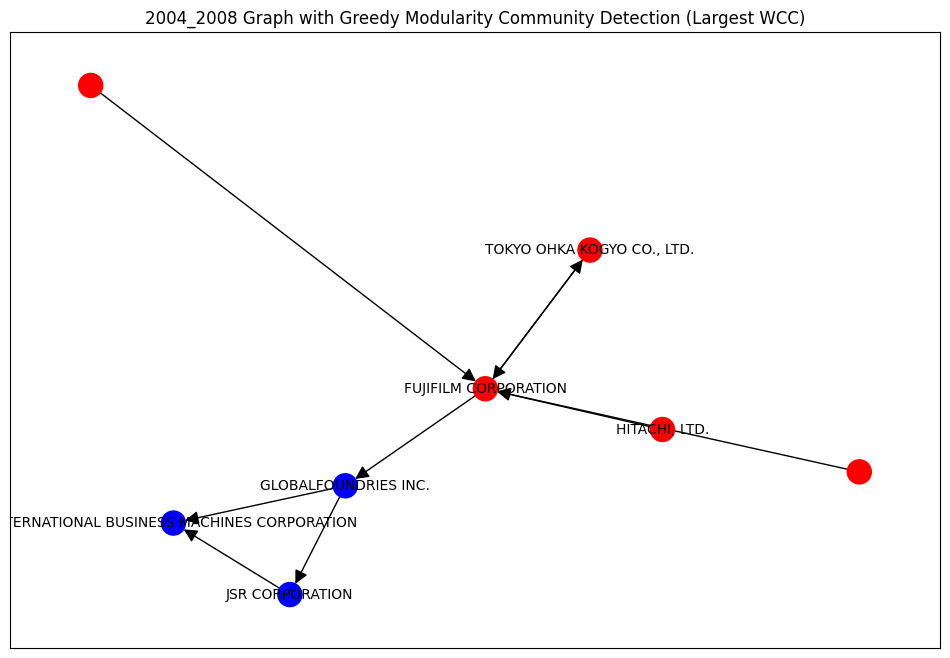

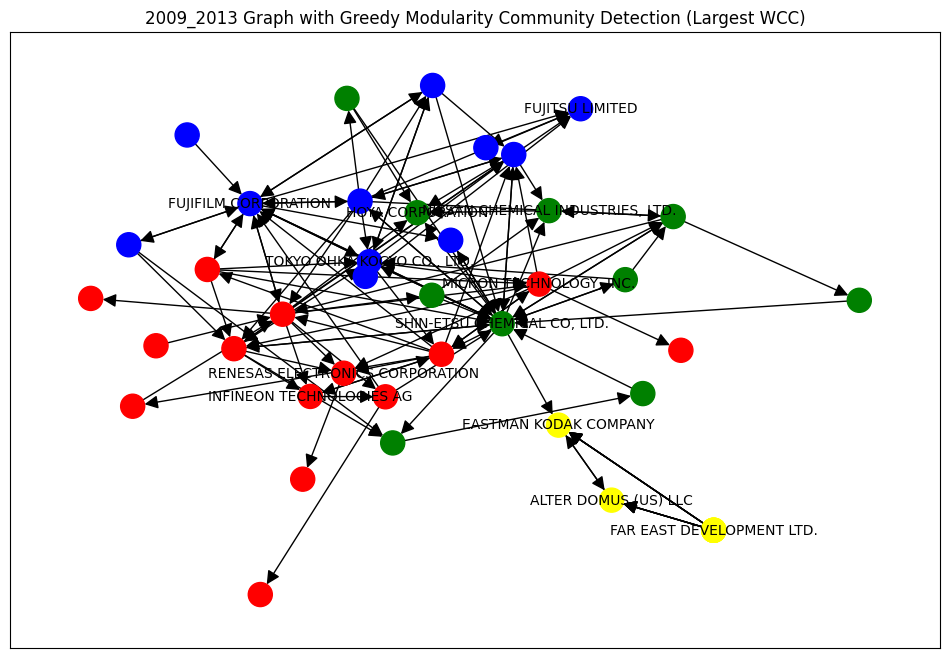

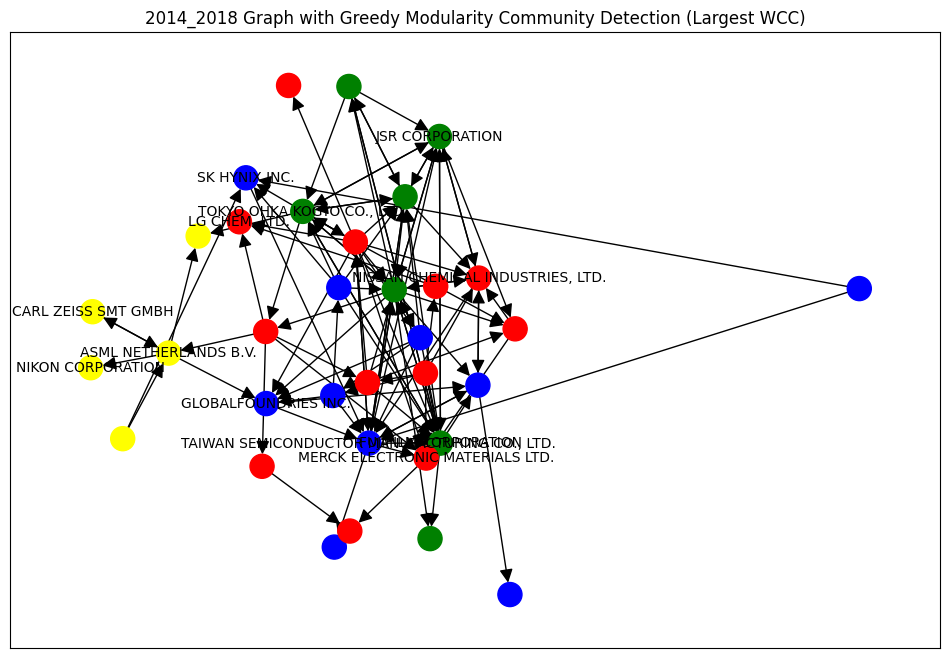

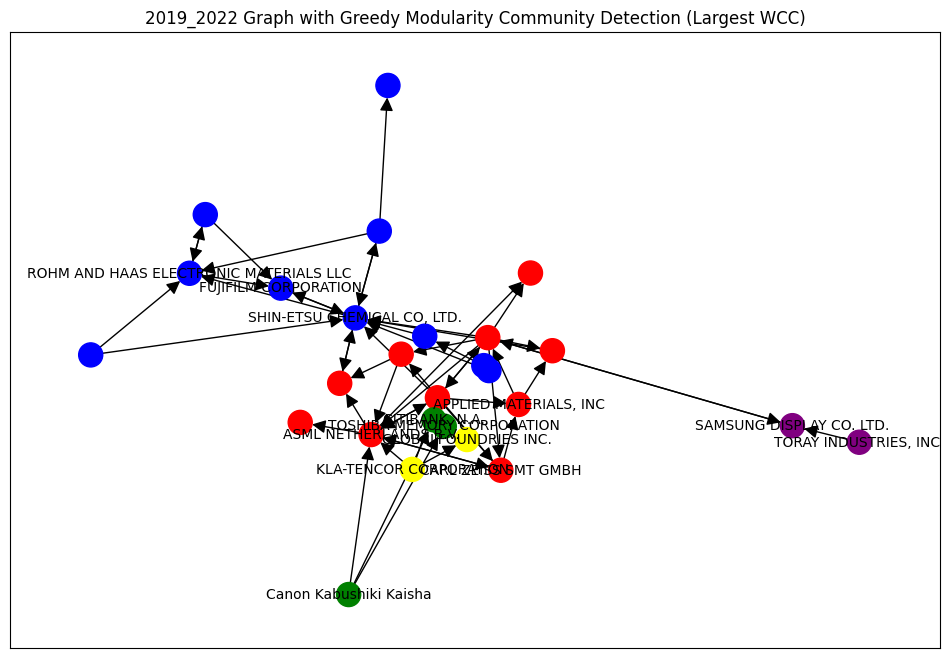

In [5]:
# draw four period graph with greedy modularity community
for i, G in enumerate([G1,G2,G3,G4]):
    DrawGraphWithGreedyModularityCommunity(G, i)

In [6]:
# define a function to draw graph with 'edge betweenness partition' community detection
def DrawGraphWithEdgeBetweennessPartition(G, number):
    # extract largest weakly connected component
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    G_sub = G.subgraph(largest_wcc).copy()

    # first turn digraph into undirected graph, perform 'edge betweenness partition'
    communities = nx.community.edge_betweenness_partition(G_sub.to_undirected(), 5) 
    community_list = [list(community) for community in communities]

    # Identify the first 3 highest in-degree node in each community
    highest_degree_nodes = []
    for community in community_list:
        subgraph = G_sub.subgraph(community)
        # Sort nodes by degree and select the top 3
        sorted_nodes = sorted(subgraph.in_degree, key=lambda x: x[1], reverse=True)
        highest_degree_nodes.extend([node for node, _ in sorted_nodes[:3]])

    # Assign colors to nodes based on their community
    color_map = {}
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
    for i, community in enumerate(community_list):
        for node in community:
            color_map[node] = colors[i % len(colors)]

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.kamada_kawai_layout(G_sub)  # Layout for visualization
    nx.draw_networkx_nodes(G_sub, pos, node_size=300, node_color=[color_map[node] for node in G_sub.nodes()])# Draw nodes with community colors
    nx.draw_networkx_edges(G_sub, pos, arrowstyle='-|>', arrowsize=20)
    # Draw labels only for the two highest degree nodes
    labels = {node: node for node in highest_degree_nodes}
    nx.draw_networkx_labels(G_sub, pos, labels, font_size=10, font_family='sans-serif')

    period = ['2004_2008','2009_2013','2014_2018','2019_2022']
    p = period[number]
    plt.title(f"{p} Graph with Edge Betweenness Partition (Largest WCC)")
    plt.show()

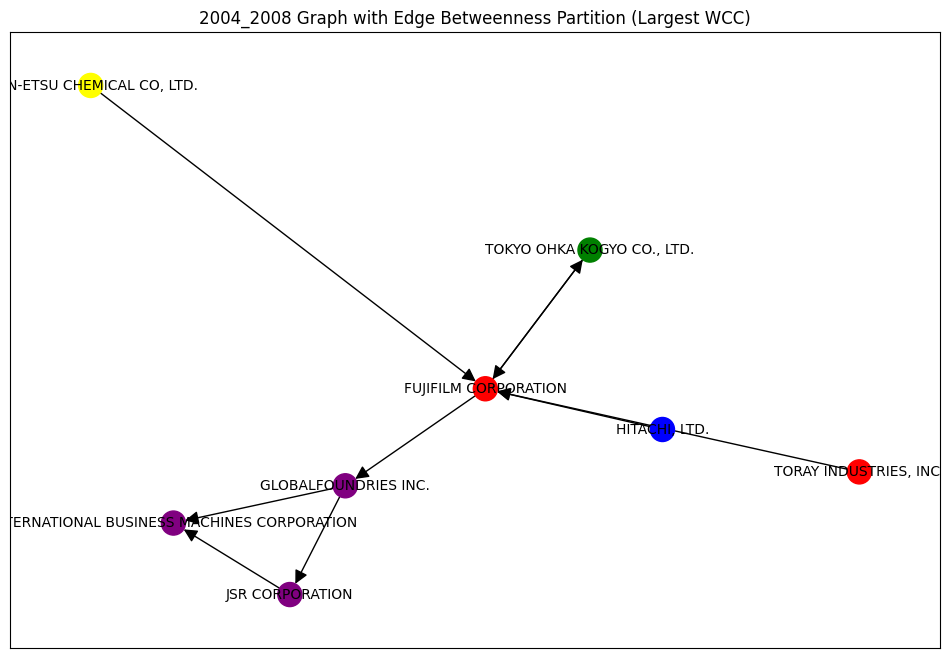

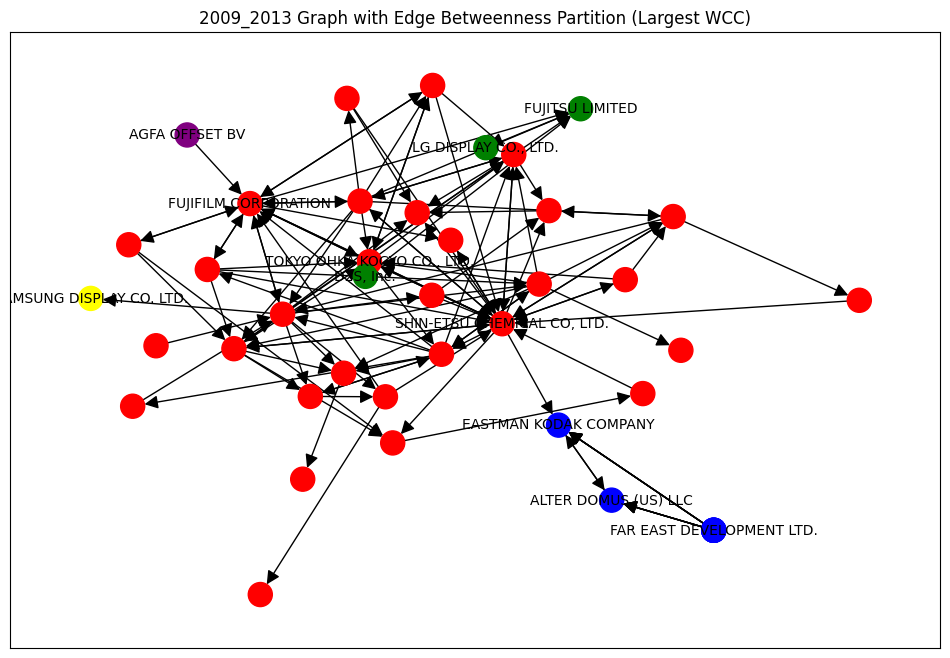

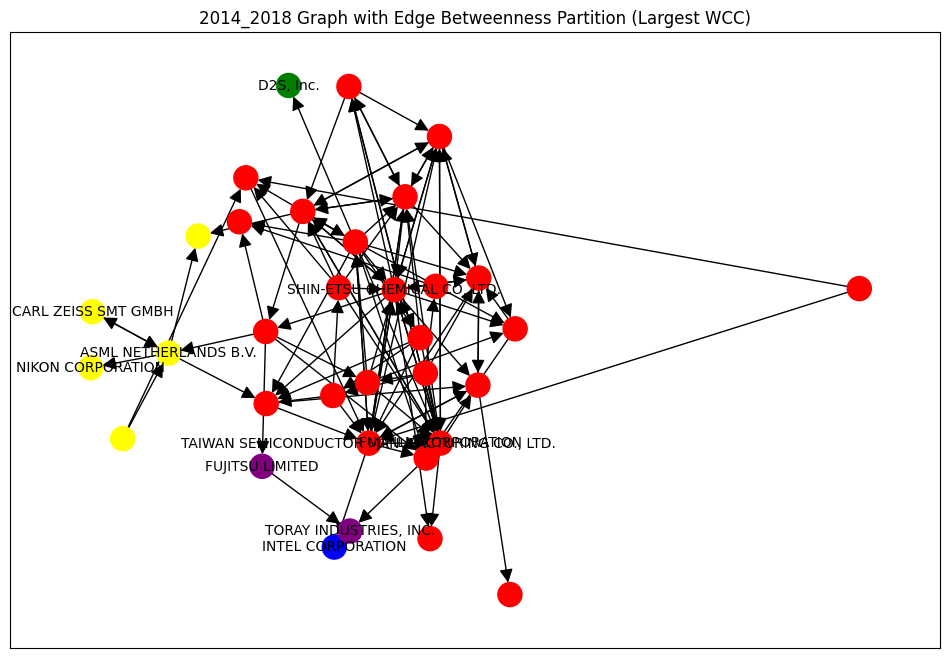

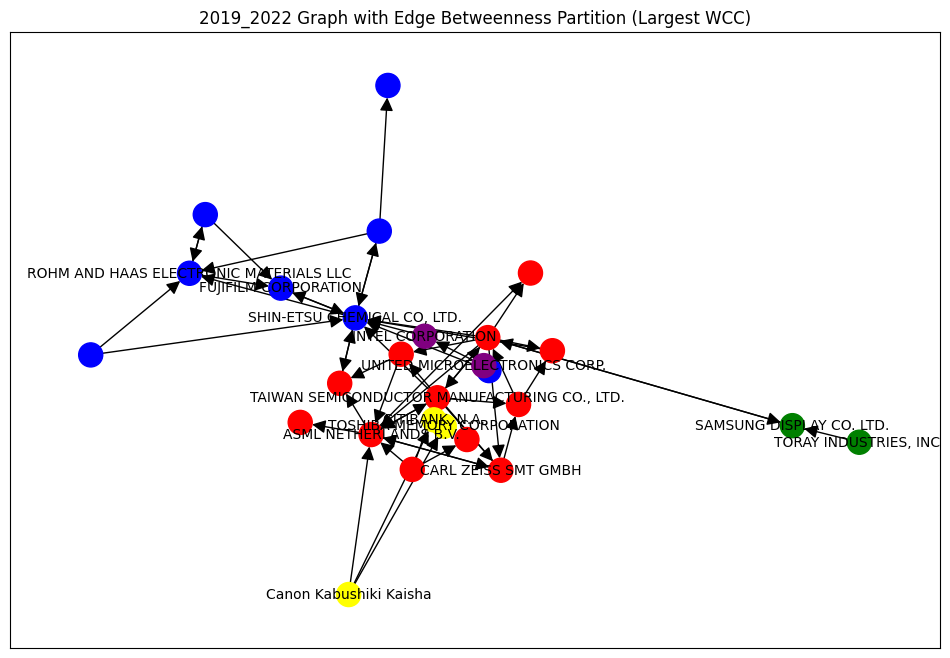

In [7]:
# draw four period graph with edge betweenness partition
for i, G in enumerate([G1,G2,G3,G4]):
    DrawGraphWithEdgeBetweennessPartition(G, i)

#### Derive Firms' Network Structural Position Classification from Community Detection Result

The group structure of a network could be classfied as four kinds of positions based 'component' analysis and 'community detection' analysis results. Those 4 positions are as follow:

|Network Position Class|Definition|
|---|---|
|Largest Community|Nodes belongs to the largest community in the largest weakly connected component.|
|Other Community|Nodes belongs to other communities in the largest weakly connected component.|
|Isolated Community|Nodes does not belongs to the largest weakly connected component, but connected with other nodes.|
|Isolated Node|Completely isolated node with no connected neighbors.|

The following classification process will be designed using edge betweenness parition, since, like we had seen above, edge betweenness parition is good at identifying the most dominant group (the concept of 'largest community' in this classification) in a field, so the network position classification objective meets nicely with edge betweenness parition.

In [1]:
import networkx as nx
import pandas as pd

In [3]:
# define a function to transform community detection result to a classification
def Community2Classification(G, ipc, period):
    # Identify the largest weakly connected component
    largest_wcc = max(list(nx.weakly_connected_components(G)), key=len)

    # Create subgraph of the largest weakly connected component
    largest_wcc_subgraph = G.subgraph(largest_wcc).copy()

    # Apply Edge Betweenness community detection
    communities = nx.community.edge_betweenness_partition(largest_wcc_subgraph.to_undirected(), 5)

    # Convert communities to a dictionary
    partition = {}
    for idx, community in enumerate(communities):
        for node in community:
            partition[node] = idx

    # calculate size of each community (count number of nodes) in the largest WCC
    community_sizes = {}
    for node, comm in partition.items():
        if comm not in community_sizes:
            community_sizes[comm] = 0
        community_sizes[comm] += 1

    # Find the largest community in the largest WCC
    largest_community = max(community_sizes, key=community_sizes.get)

    # Classify nodes
    node_labels = {}
    for node in G.nodes():
        if node in largest_wcc:
            comm = partition.get(node, None)
            if comm == largest_community:
                node_labels[node] = 'largest community'
            else:
                node_labels[node] = 'other community'
        else:
            neighbors = set(G.neighbors(node)).union(set(G.predecessors(node)))
            if len(neighbors) > 0:
                node_labels[node] = 'isolate community'
            else:
                node_labels[node] = 'isolate node'

    # Create a DataFrame
    df = pd.DataFrame(node_labels.items(), columns=['Node', 'Classification'])
    df['IPC'] = ipc
    df['period'] = period
    
    return df

In [4]:
G03F_p1_comm_class_df = Community2Classification(G1, 'G03F', '2004_2008')
G03F_p2_comm_class_df = Community2Classification(G2, 'G03F', '2009_2013')
G03F_p3_comm_class_df = Community2Classification(G3, 'G03F', '2014_2018')
G03F_p4_comm_class_df = Community2Classification(G4, 'G03F', '2019_2022')

# merge four dataframe
G03F_comm_class_df = pd.concat([G03F_p1_comm_class_df, G03F_p2_comm_class_df, G03F_p3_comm_class_df, G03F_p4_comm_class_df], axis = 0)


In [5]:
# save result
G03F_comm_class_df.to_csv(r"C:\Users\user\Documents\G03F_community2position.csv")

Show the evolution of frequency distribution over the four network position classes throughout the four periods.

In [6]:
# Function to count classifications in a dataframe
def count_classifications(df):
    return df['Classification'].value_counts()

# Count classifications for each time period
counts1 = count_classifications(G03F_p1_comm_class_df)
counts2 = count_classifications(G03F_p2_comm_class_df)
counts3 = count_classifications(G03F_p3_comm_class_df)
counts4 = count_classifications(G03F_p4_comm_class_df)

# Combine the counts into a summary dataframe
summary_df = pd.DataFrame({
    'Period 1': counts1,
    'Period 2': counts2,
    'Period 3': counts3,
    'Period 4': counts4
}).fillna(0).astype(int)

# Reorder rows based on all possible classifications
all_classifications = ['largest community', 'other community', 'isolate community', 'isolate node']
summary_df = summary_df.reindex(all_classifications)

display(summary_df)

,Period 1,Period 2,Period 3,Period 4
Classification,,,,
largest community,3,30,25,12
other community,5,12,9,15
isolate community,3,0,0,2
isolate node,9,2,6,5


### Next Step: Merge Attribute_Centrality table and Community_Position table

In [1]:
import pandas as pd
import re

In [2]:
attr_cent_df = pd.read_csv(r"C:\Users\user\Documents\G03F_attributes_centrality.csv", index_col=0)
position_df = pd.read_csv(r"C:\Users\user\Documents\G03F_community2position.csv", index_col=0)

In [3]:
attr_cent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   專利權人         186 non-null    object 
 1   專利件數         186 non-null    int64  
 2   他人引證次數       186 non-null    int64  
 3   自我引證次數       186 non-null    int64  
 4   發明人數         186 non-null    int64  
 5   平均專利年齡       186 non-null    int64  
 6   活動年期         186 non-null    int64  
 7   相對研發能力       183 non-null    float64
 8   國家           186 non-null    object 
 9   時期           186 non-null    object 
 10  indegree     138 non-null    float64
 11  closeness    138 non-null    float64
 12  betweenness  138 non-null    float64
 13  harmonic     138 non-null    float64
 14  eigenvector  138 non-null    float64
 15  katz         138 non-null    float64
 16  pagerank     138 non-null    float64
 17  laplacian    138 non-null    float64
dtypes: float64(9), int64(6), object(3)
memory usage: 27.6+ 

In [4]:
position_df.head()

,Node,Classification,IPC,period
0,"TOKYO OHKA KOGYO CO., LTD.",other community,G03F,2004_2008
1,FUJIFILM CORPORATION,other community,G03F,2004_2008
2,GLOBALFOUNDRIES INC.,largest community,G03F,2004_2008
3,"SHIN-ETSU CHEMICAL CO, LTD.",other community,G03F,2004_2008
4,TOSHIBA MEMORY CORPORATION,isolate node,G03F,2004_2008


#### clean position_df Node name

In [5]:
# Node name in position_df had not been cleaned
set(position_df['Node'])

{'AGC INC.',
 'AGFA OFFSET BV',
 'ALTER DOMUS (US) LLC',
 'APPLIED MATERIALS, INC',
 'ASML NETHERLANDS B.V.',
 'AZ ELECTRONIC MATERIALS S.À R.L.',
 'BOE TECHNOLOGY GROUP CO., LTD.',
 'CARL ZEISS SMT GMBH',
 'CHEIL INDUSTRIES INC.',
 'CITIBANK, N.A.',
 'Canon Kabushiki Kaisha',
 'D2S, Inc.',
 'EASTMAN KODAK COMPANY',
 'FAR EAST DEVELOPMENT LTD.',
 'FPC INC.',
 'FUJIFILM CORPORATION',
 'FUJITSU LIMITED',
 'GLOBALFOUNDRIES INC.',
 'HITACHI, LTD.',
 'HOYA CORPORATION',
 'INFINEON TECHNOLOGIES AG',
 'INTEL CORPORATION',
 'INTERNATIONAL BUSINESS MACHINES CORPORATION',
 'International Business Machines Corporation',
 'JSR CORPORATION',
 'JSR Corporation',
 'KLA-TENCOR CORPORATION',
 'LASER PACIFIC MEDIA CORPORATION',
 'LG CHEM, LTD.',
 'LG DISPLAY CO., LTD.',
 'MERCK ELECTRONIC MATERIALS LTD.',
 'MICRON TECHNOLOGY, INC.',
 'NIKON CORPORATION',
 'NISSAN CHEMICAL INDUSTRIES, LTD.',
 'NPEC INC.',
 'QUALEX INC.',
 'RENESAS ELECTRONICS CORPORATION',
 'ROHM AND HAAS ELECTRONIC MATERIALS LLC',
 'SAM

In [6]:
def clean_firm_name(name):
    # Remove common suffixes and special characters
    name = re.sub(r'(CORPORATION|KABUSHIKI KAISHA|CO., LTD.|LTD.|INC.|COMPANY, L.P.|N.A.|AS AGENT|N.V.|LLC|GMBH|LIMITED|B.V.|,|\.|LTD|COMPANY|GROUP| LICENSING)', '', name, flags=re.IGNORECASE)
    name = name.upper().strip()  # Convert to uppercase and trim whitespace
    return name

In [7]:
# firm name list from position_df
position_firm_list = position_df['Node'].to_list()

# clean name list from position_df
cleaned_position_firm_list = [clean_firm_name(name) for name in position_firm_list]

# replace Node names with cleaned names
position_df['Node'] = cleaned_position_firm_list

In [13]:
# these firm names should be adjusted to match the for in attr_df
firm_only_in_position = list(set(position_df['Node']) - set(attr_cent_df['專利權人']))
firm_only_in_position

[]

In [12]:
# change firm name in centrality_df to firm name in attr_df
position_df.loc[position_df['Node'] == 'APPLIED MATERIALS INC','Node'] = 'APPLIED MATERIALS'

In [14]:
firm_only_in_attr_cent = set(attr_cent_df['專利權人']) - set(position_df['Node'])
firm_only_in_attr_cent

set()

In [15]:
# save the position_df with cleaned firm name
position_df.to_csv(r"C:\Users\user\Documents\G03F_community2position.csv")

#### merge two tables

In [16]:
# load two dataframe again
attr_cent_df = pd.read_csv(r"C:\Users\user\Documents\G03F_attributes_centrality.csv", index_col=0)
position_df = pd.read_csv(r"C:\Users\user\Documents\G03F_community2position.csv", index_col=0)

In [17]:
# confirm that firm names in two dataframe are in same form
firm_only_in_position = list(set(position_df['Node']) - set(attr_cent_df['專利權人']))
print(firm_only_in_position)
firm_only_in_attr_cent = set(attr_cent_df['專利權人']) - set(position_df['Node'])
print(firm_only_in_attr_cent)

[]
set()


In [18]:
# reset position_df index
position_df = position_df.reset_index()
position_df = position_df.drop('index', axis=1)
position_df.head()

,Node,Classification,IPC,period
0,TOKYO OHKA KOGYO,other community,G03F,2004_2008
1,FUJIFILM,other community,G03F,2004_2008
2,GLOBALFOUNDRIES,largest community,G03F,2004_2008
3,SHIN-ETSU CHEMICAL CO,other community,G03F,2004_2008
4,TOSHIBA MEMORY,isolate node,G03F,2004_2008


In [19]:
## we can now start to merge two dataframe
# first, add 'position_class' columns to attr_cent_df
attr_cent_df['position_class'] = None

# next, extract 'Classification' column value from position_df and fill them to attr_cent_df 'position_class' column
for row in range(len(position_df)):
    firm_name = position_df.loc[row,'Node']
    period = position_df.loc[row,'period']
    classification_value = position_df.loc[(position_df['Node'] == firm_name) & (position_df['period'] == period), 
                        'Classification'].iloc[0,]
    attr_cent_df.loc[(attr_cent_df['專利權人'] == firm_name) & (attr_cent_df['時期'] == period), 
                    'position_class'] = classification_value

In [20]:
attr_cent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   專利權人            186 non-null    object 
 1   專利件數            186 non-null    int64  
 2   他人引證次數          186 non-null    int64  
 3   自我引證次數          186 non-null    int64  
 4   發明人數            186 non-null    int64  
 5   平均專利年齡          186 non-null    int64  
 6   活動年期            186 non-null    int64  
 7   相對研發能力          183 non-null    float64
 8   國家              186 non-null    object 
 9   時期              186 non-null    object 
 10  indegree        138 non-null    float64
 11  closeness       138 non-null    float64
 12  betweenness     138 non-null    float64
 13  harmonic        138 non-null    float64
 14  eigenvector     138 non-null    float64
 15  katz            138 non-null    float64
 16  pagerank        138 non-null    float64
 17  laplacian       138 non-null    float64


In [21]:
# save dataframe
attr_cent_df.to_csv(r"C:\Users\user\Documents\G03F_attribute_centrality_position.csv")